In [1]:
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train= X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [0]:
classes = 10
Y_train = np_utils.to_categorical(Y_train,classes)
Y_test = np_utils.to_categorical(Y_test,classes)

In [5]:
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 100

model = Sequential([
                    Dense(hidden_neurons,input_dim=input_size),
                    Activation('sigmoid'),
                    Dense(classes),
                    Activation('softmax')
])

In [6]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')
model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1)

score = model.evaluate(X_test,Y_test,verbose=1)
print('Test Accuracy:',score[1])

weights = model.layers[0].get_weights()




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





60000/60000 [==============================] - 2s 36us/step - loss: 0.9878 - acc: 0.7491
Epoch 2/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.4977 - acc: 0.8781
Epoch 3/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.3980 - acc: 0.8973
Epoch 4/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3483 - acc: 0.9082
Epoch 5/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.3175 - acc: 0.9139
Epoch 6/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.2951 - acc: 0.9193
Epoch 7/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.2783 - acc: 0.9229
Epoch 8/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.2621 - acc: 0.9283
Epoch 9/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.2520 -

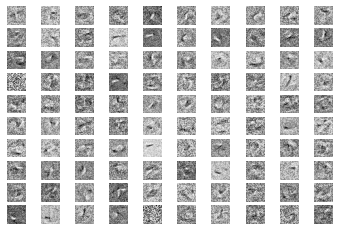

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()

w = weights[0].T
for neuron in range(hidden_neurons):
  ax = fig.add_subplot(10,10,neuron+1)
  ax.axis("off")
  ax.imshow(numpy.reshape(w[neuron],(28,28)),cmap=cm.Greys_r)

plt.savefig("neurons_images.png",dpi=300)
plt.show()